In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [3]:
model5000h = load_model('C:/Users/vovaz/Desktop/my stuff/Code/Projects/linux_run/cm21fast/model_unet(1).keras')
model1000h = load_model('C:/Users/vovaz/Desktop/my stuff/Code/Projects/linux_run/cm21fast/model_unet1000h.keras')

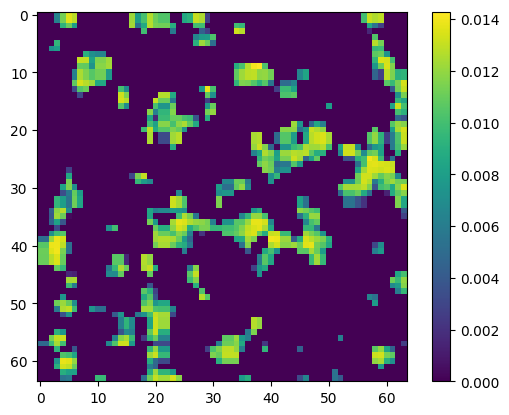

In [118]:
lc_arrays = np.load('C:/Users/vovaz/Desktop/my stuff/Code/Projects/linux_run/cm21fast/arrays_lc_2D.npz')
lightcone = np.load("C:/Users/vovaz/Desktop/my stuff/Code/Projects/linux_run/cm21fast/databases/lc_test/lc_2.npy")[:,:,0]/1000
#2
plt.imshow(lightcone)
plt.colorbar()
plt.show()

In [119]:
noise1000h = np.random.normal(0, 0.035, (64, 64)) # 1000h normalisation
noise5000h = np.random.normal(0, 0.0125, (64, 64)) # 5000h normalisation

In [120]:
lc1000h = lightcone + noise1000h
min_val_1000h = lc1000h.min()
max_val_1000h = lc1000h.max()
normalized_1000h_array = (lc1000h - min_val_1000h) / (max_val_1000h - min_val_1000h)

lc5000h = lightcone + noise5000h
min_val_5000h = lc5000h.min()
max_val_5000h = lc5000h.max()
normalized_5000h_array = (lc5000h - min_val_5000h) / (max_val_5000h - min_val_5000h)


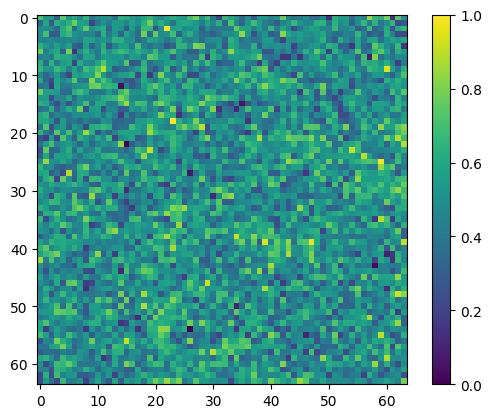

In [121]:
plt.imshow(normalized_5000h_array)
plt.colorbar()

In [122]:
normalized_1000h_array1 = np.reshape(normalized_1000h_array, (1,64,64))
normalized_5000h_array1 = np.reshape(normalized_5000h_array, (1,64,64))

In [123]:
prediction1000h = model1000h.predict(normalized_1000h_array1)
prediction5000h = model5000h.predict(normalized_5000h_array1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


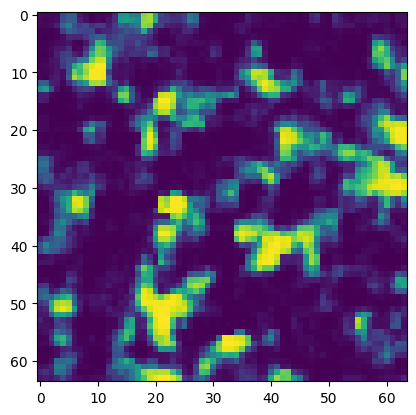

In [124]:
plt.imshow(prediction5000h[0])

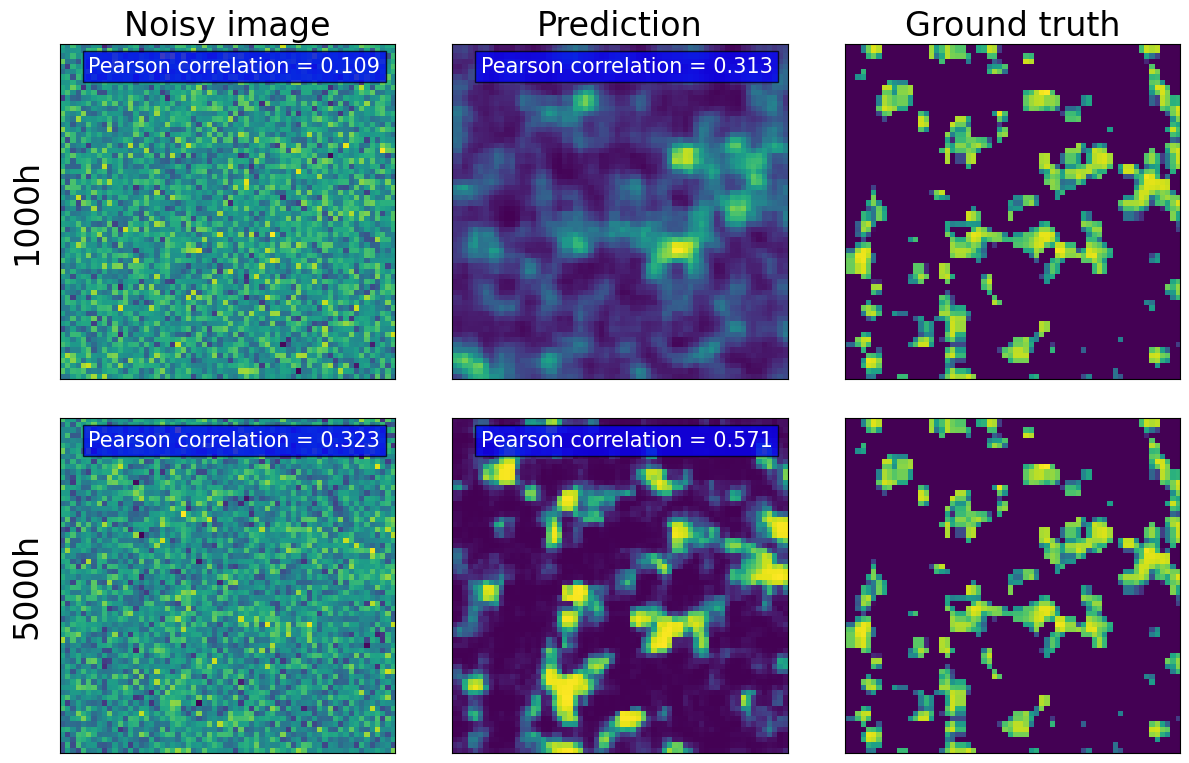

In [125]:
from scipy.stats import pearsonr

corr1, _ = pearsonr(normalized_1000h_array.flatten(), lightcone.flatten())
corr2, _ = pearsonr(prediction1000h[0].flatten(), lightcone.flatten())
corr3, _ = pearsonr(normalized_5000h_array.flatten(), lightcone.flatten())
corr4, _ = pearsonr(prediction5000h[0].flatten(), lightcone.flatten())


plt.figure(figsize = (12,8))



plt.subplot(231)
plt.ylabel('1000h', fontsize=24, labelpad=12)
plt.title('Noisy image', fontsize=24)
plt.xticks([])
plt.yticks([])
plt.imshow(normalized_1000h_array)
plt.text(5, 5, 'Pearson correlation = {}'.format(round(corr1,3)), fontsize=15, color='white', 
         bbox=dict(facecolor='blue', alpha=0.75))

plt.subplot(232)
plt.title('Prediction', fontsize=24)
plt.xticks([])
plt.yticks([])
plt.imshow(prediction1000h[0])
plt.text(5, 5, 'Pearson correlation = {}'.format(round(corr2,3)), fontsize=15, color='white', 
         bbox=dict(facecolor='blue', alpha=0.75))

plt.subplot(233)
plt.title('Ground truth', fontsize=24)
plt.xticks([])
plt.yticks([])
plt.imshow(lightcone)



plt.subplot(234)
plt.ylabel('5000h', fontsize=24, labelpad=12)
plt.xticks([])
plt.yticks([])
plt.imshow(normalized_5000h_array)
plt.text(5, 5, 'Pearson correlation = {}'.format(round(corr3,3)), fontsize=15, color='white', 
         bbox=dict(facecolor='blue', alpha=0.75))

plt.subplot(235)
plt.xticks([])
plt.yticks([])
plt.imshow(prediction5000h[0])
plt.text(5, 5, 'Pearson correlation = {}'.format(round(corr4,3)), fontsize=15, color='white', 
         bbox=dict(facecolor='blue', alpha=0.75))

plt.subplot(236)
plt.xticks([])
plt.yticks([])
plt.imshow(lightcone)

plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

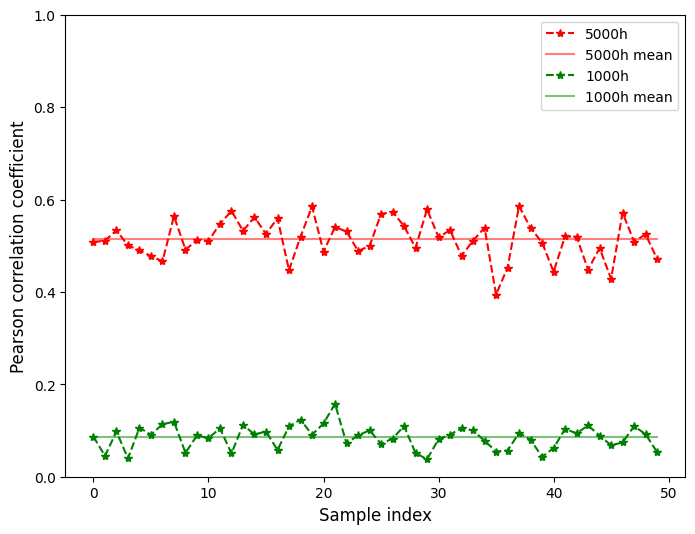

[]


In [141]:
coeffs = []
coeffs1 = []

for i in range(50):
    lc = np.load("C:/Users/vovaz/Desktop/my stuff/Code/Projects/linux_run/cm21fast/databases/lc_test/lc_{}.npy".format(i+1))[:,:,0]/1000
    noise = np.random.normal(0, 0.0125, (64, 64)) # 5000h normalisation
    noise1 = np.random.normal(0, 0.035, (64, 64))

    lc1 = lc+noise
    lc2 = lc+noise1
    min_val = lc1.min()
    max_val = lc1.max()
    normalized_array = (lc1- min_val) / (max_val - min_val)
    input = np.reshape(normalized_array, (1,64,64))

    min_val1 = lc2.min()
    max_val1 = lc2.max()
    normalized_array1 = (lc2- min_val1) / (max_val1 - min_val1)
    input1 = np.reshape(normalized_array1, (1,64,64))

    pred = model5000h.predict(input)
    pred1 = model1000h.predict(input1)


    corr, _ = pearsonr(lc.flatten(), pred[0].flatten())
    corr1, _ = pearsonr(lc1.flatten(), pred1[0].flatten())
    coeffs.append(corr)
    coeffs1.append(corr1)
    

plt.figure(figsize=(8,6))
plt.subplot(111)
plt.plot(coeffs,  '*--', color='red', label='5000h')
plt.plot([0, 49], [np.mean(coeffs), np.mean(coeffs)], alpha=0.5, color='red', label='5000h mean')
plt.plot(coeffs1,  '*--', color='green', label='1000h')
plt.plot([0, 49], [np.mean(coeffs1), np.mean(coeffs1)], alpha=0.5, color='green', label='1000h mean')
plt.ylim(0,1)
plt.legend()
plt.xlabel('Sample index', fontsize = 12)
plt.ylabel('Pearson correlation coefficient', fontsize = 12)
plt.show()

print(np.argwhere(np.max(coeffs)))
